In [1]:
import pandas as pd
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf

In [3]:
df=pd.read_csv('WHR2023.csv')
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


In [5]:
df.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [6]:
df.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [7]:
df.shape

(137, 19)

In [8]:
df.isna().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [10]:
df.nunique()

Country name                                  137
Ladder score                                  134
Standard error of ladder score                 64
upperwhisker                                  136
lowerwhisker                                  131
Logged GDP per capita                         135
Social support                                116
Healthy life expectancy                       125
Freedom to make life choices                  117
Generosity                                    122
Perceptions of corruption                     115
Ladder score in Dystopia                        1
Explained by: Log GDP per capita              133
Explained by: Social support                  126
Explained by: Healthy life expectancy         111
Explained by: Freedom to make life choices    116
Explained by: Generosity                      109
Explained by: Perceptions of corruption       111
Dystopia + residual                           133
dtype: int64

In [11]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [15]:
df.corr()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Ladder score,1.000000,-0.511006,0.999405,0.999451,0.783836,0.838056,0.746928,0.661960,0.039829,-0.470561,NaN,0.783811,0.838161,0.746699,0.661944,0.039395,0.470568,0.494452
Standard error of ladder score,-0.511006,1.000000,-0.481067,-0.539204,-0.583166,-0.479001,-0.616240,-0.292048,0.104190,0.301629,NaN,-0.583116,-0.479228,-0.616204,-0.291945,0.104223,-0.301647,-0.006732
upperwhisker,0.999405,-0.481067,1.000000,0.997714,0.776073,0.835510,0.737112,0.663457,0.044760,-0.467916,NaN,0.776049,0.835608,0.736880,0.663445,0.044319,0.467924,0.503968
lowerwhisker,0.999451,-0.539204,0.997714,1.000000,0.790438,0.839536,0.755561,0.659802,0.035022,-0.472646,NaN,0.790412,0.839646,0.755335,0.659782,0.034595,0.472654,0.484722
Logged GDP per capita,0.783836,-0.583166,0.776073,0.790438,1.000000,0.741762,0.837533,0.449462,-0.162298,-0.435373,NaN,1.000000,0.741820,0.837520,0.449482,-0.162722,0.435424,-0.044568
Social support,0.838056,-0.479001,0.835510,0.839536,0.741762,1.000000,0.725524,0.546319,0.040528,-0.275255,NaN,0.741657,0.999997,0.725404,0.546546,0.039941,0.275124,0.148731
Healthy life expectancy,0.746928,-0.616240,0.737112,0.755561,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396,NaN,0.837531,0.725454,0.999998,0.415195,-0.135356,0.404526,-0.014420
Freedom to make life choices,0.661960,-0.292048,0.663457,0.659802,0.449462,0.546319,0.415092,1.000000,0.164666,-0.381467,NaN,0.449413,0.546317,0.414861,0.999994,0.164080,0.381349,0.211993
Generosity,0.039829,0.104190,0.044760,0.035022,-0.162298,0.040528,-0.135036,0.164666,1.000000,-0.118300,NaN,-0.162244,0.040340,-0.135202,0.164679,0.999990,0.118008,0.016380
Perceptions of corruption,-0.470561,0.301629,-0.467916,-0.472646,-0.435373,-0.275255,-0.404396,-0.381467,-0.118300,1.000000,NaN,-0.435347,-0.275446,-0.404289,-0.381485,-0.117630,-0.999996,-0.004467


In [16]:
df.tail()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
136,Afghanistan,1.859,0.033,1.923,1.795,7.324,0.341,54.712,0.382,-0.081,0.847,1.778,0.645,0.000,0.087,0.000,0.093,0.059,0.976


In [20]:
df.rank()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,39.0,136.0,6.0,136.0,136.0,119.0,135.0,114.0,136.0,57.0,2.0,68.5,119.0,135.0,114.0,136.0,57.0,135.0,121.0
1,32.0,135.0,13.0,135.0,135.0,128.0,134.0,116.5,126.5,107.0,3.0,68.5,128.0,134.0,116.5,126.0,107.0,134.0,104.0
2,52.0,134.0,40.5,134.0,134.0,125.0,136.0,125.5,128.0,124.0,35.0,68.5,125.0,136.0,125.5,128.0,124.0,102.0,118.0
3,58.0,133.0,3.0,133.0,133.0,110.0,127.0,130.0,75.0,56.0,44.0,68.5,110.0,127.5,130.0,75.0,56.0,93.0,133.0
4,90.0,132.0,1.5,131.0,132.0,127.0,118.0,122.0,109.5,125.0,10.0,68.5,127.0,118.0,122.0,109.5,125.0,127.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,27.0,5.0,125.0,5.0,4.0,2.0,23.0,10.0,19.0,92.0,93.5,68.5,2.0,23.0,10.0,19.0,92.0,43.5,16.0
133,136.0,4.0,71.0,4.0,5.0,11.0,28.5,3.0,14.0,46.5,64.0,68.5,11.0,28.5,3.0,14.0,46.5,73.0,9.0
134,109.0,3.0,112.5,3.0,3.0,10.0,8.0,8.0,18.0,100.0,110.0,68.5,10.0,8.0,7.5,18.0,100.0,28.0,18.0
135,70.0,2.0,25.0,2.0,2.0,62.5,4.0,71.0,3.0,14.0,122.0,68.5,62.5,4.0,71.0,3.0,14.0,14.5,1.0


In [38]:
df.index= range(1,137)
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Rank
1,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,39.0
2,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,32.0
3,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,52.0
4,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,58.0
5,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162,27.0
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905,136.0
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221,109.0
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110,70.0


In [41]:
df['Rank']= range(1,137)

In [42]:
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Rank
1,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,1
2,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,2
3,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,3
4,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,4
5,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162,132
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905,133
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221,134
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110,135


In [49]:
df.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Rank'],
      dtype='object')

In [50]:
print("No. of countries ranked in 2023: ", len(df))

No. of countries ranked in 2023:  136


<AxesSubplot:xlabel='Country name', ylabel='Rank'>

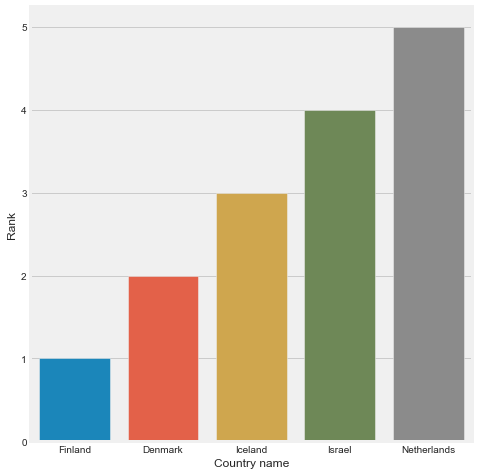

In [51]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
sns.barplot(df['Country name'][0:5], df['Rank'][0:5])

In [52]:
print("Most unphappiest Country in 2023: ", df['Country name'].iat[-1], "(", df['Ladder score'].iat[-1], ')')

Most unphappiest Country in 2023:  Afghanistan ( 1.859 )


In [54]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           z = df['Rank'], 
           text = df['Country name'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness 2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [56]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           z = df['Explained by: Log GDP per capita'], 
           text = df['Country name'],
           colorbar = {'title':'GDP per capita'})
layout = dict(title = 'GDP per capita in 2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [57]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           z = df['Explained by: Healthy life expectancy'], 
           text = df['Country name'],
           colorbar = {'title':' Healthy life expectancy'})
layout = dict(title = ' Healthy life expectancy in 2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [58]:
print("Average life expectancy in 2023: ",df['Healthy life expectancy'].mean())

Average life expectancy in 2023:  64.96763235294114


In [59]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)

data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           z = df['Explained by: Social support'], 
           text = df['Country name'],
           colorbar = {'title':'Social support'})
layout = dict(title = 'Social support in 2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [61]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           z = df['Explained by: Freedom to make life choices'], 
           text = df['Country name'],
           colorbar = {'title':'Freedom to make life choices in 2023'})
layout = dict(title = 'Freedom to make life choices in 2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [63]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           z = df['Explained by: Generosity'], 
           text = df['Country name'],
           colorbar = {'title':'Generosity'})
layout = dict(title = 'Generosity in 2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

In [65]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country name'],
           locationmode = 'country names',
           z = df['Explained by: Perceptions of corruption'], 
           text = df['Country name'],
           colorbar = {'title':'Perceptions of corruption'})
layout = dict(title = 'Perceptions of corruption in 2023', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

<AxesSubplot:title={'center':'Correlation between the features'}>

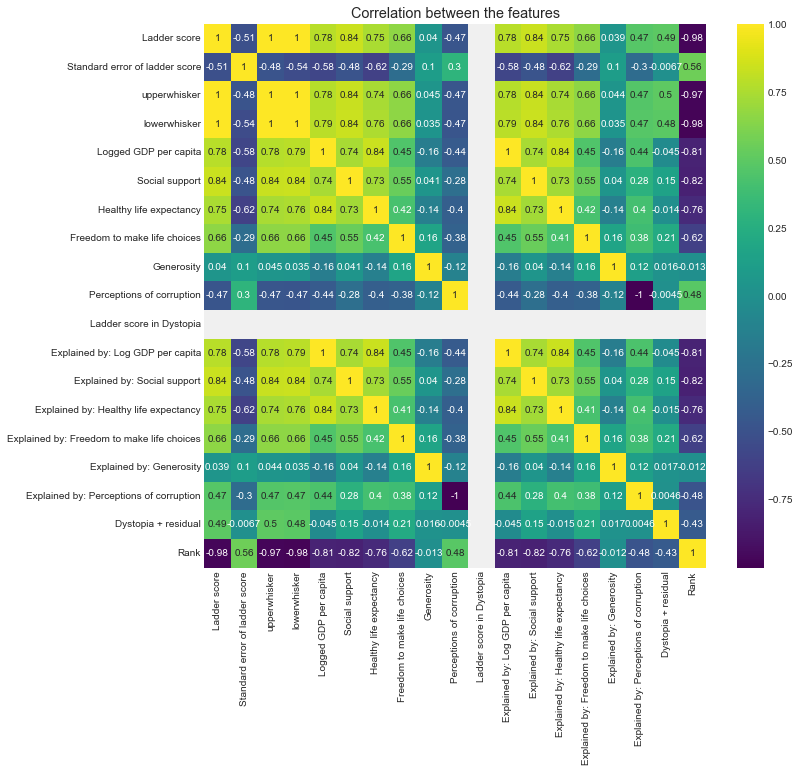

In [66]:
plt.figure(figsize=(10,10))
plt.title('Correlation between the features')
sns.heatmap(df.corr(), cmap = "viridis", annot = True)